# Modélisation du modèle 

# Sommaire 
- 1 - Introduction
- 2 - Polymère
- 3 - Calcul de la concentration
- 4 - Table des valeurs 
- 5 - Calcul de c2
- 6 - Graphiques

# Introduction 
Ce programme nous permet de modéliser la concentration (c2) pour différents food simulant. Cela nous permet également de tracer différents graphiques. 

In [19]:
import numpy as np
import pandas as pd
import math
import cmath
from scipy.optimize import root
import matplotlib.pyplot as plt
%matplotlib inline

# Polymère 


In [20]:
a = ("Table1.txt")
a

'Table1.txt'

# Calcul de la concentration finale 
Nous avons besoin de différentes valeurs de concentration qui sont les suivantes : 
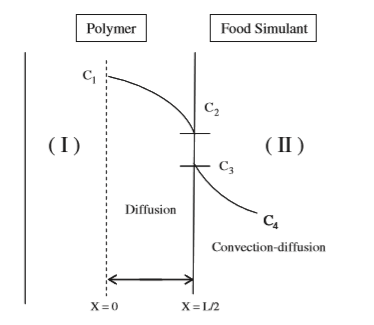
Afin de calculer la concentration finale, nous avons besoin d'équations qui sont les suivantes : 
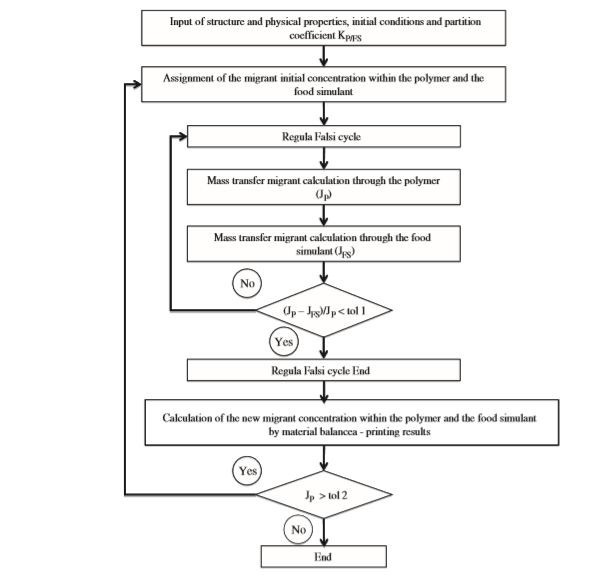
Afin de calculer cela, il faut suivre la méthode précédente. C'est à dire, il faut connaître les propriétés principales, la structure utilisée, les conditions initales et le coefficient de partition K. 
Ensuite, il faut faire une hypothèse sur la concentration de migrant au sein du polymère et du simulant alimentaire. Ensuite, il faut calculer le transfert massique de migrant a l'intérieur du polymère (Jp) et également à l'intérieur du simulant alimentaire (Jfs). Ceux sont des phénomènes de transfert de matière. Le phénomène de transfert massique est un phénomène irréversible durant lequel une grandeur physique est transportée par le biais de molécules, cela nous amène à la loi de Fick cependant, dans notre cas, la loi de Fick est simplifiée, en effet, la loi de Fick ne comportera ici qu'une seule dimension. Et ce transfert peut être défini de cette manière J = (Dp/(L/2))x(C1-C2).
Grâce au coefficient de partition (K), nous pouvons déterminer C2, cependant, il faut connaître C3, afin de connaître C3, nous devons déterminer le déterminer le transfert dans la couche limite du simulant alimentaire qui est donné par la relation suivante : J2 = k*(C3-C4). Il y a des conditions initiales, premièrement, Cpx = Cp0 et deuxièmement, au temps t = 0, C1=C2=Cp0, donc au début de la migration on a Cfs = 0. La dernière condition est que $ \frac{\partial c_{Cpx}}{\partial x}$ est égale à 0. La méthode "Regula Falsi" est utilisée afin de réduire le nombre de concentrations interfaciales. Le nombre d'itérations s'arrête losque J1=J2. 

In [31]:
class InterfazPolimero:
    def __init__ (self,a):
        self.a=a

    def Lire(self):
        self.tab = pd.read_csv(self.a,sep=" ")
        coef =self.tab.values
        self.Experiment = coef[:,0]
        self.Thickness = coef[:,1]
        self.FoodSimulant = coef[:,2]
        self.Cpo = coef[:,3]
        self.K = coef [:,4]
        self.Dp = coef[:,5]
        self.RMSE = coef[:,6]
        self.k = coef[:,7]
        self.c4 = coef[:,8]
#         self.c1 =coef[:,9]
        self.c2 = np.zeros(10)
        
        return self.tab
    
    def inicializarC2(self):
        self.c2 = np.zeros(10)
        self.dimension = np.shape(self.c2)
        print(self.dimension)
        return self.c2
    
    
    def calcul(self):
        self.tab["j1"] = (self.tab["Dp"] / (self.tab["Thickness"] / 2)) * (self.tab["Cpo"] - self.c2)
        print(self.tab["j1"])
        self.c3 = self.c2 / self.K
        self.j2 = self.k * (self.c3 - self.tab["c4"])
        return (self.tab["j1"] - self.j2) / self.tab["j1"]
            
    def calcul2(self): 
        i = 0
        for self.tab["Thickness"], self.tab["Dp"], self.tab["K"], self.tab["k"], self.tab["c"] in enumerate(tab):
            self.sol = root(calcul,15,args=(float(self.tab["Dp"]),float(self.tab["k"]),float(self.tab["K"]),float(self.tab["c4"]),float(self.tab["Cpo"]),float(self.tab["Thickness"])))
            c2[i]= self.sol.x
            i = i + 1
        print(self.c2)
        return self.c2

    
    def Garder(self):
        raw_data ={"résultat" : [1.115510936772821, 1.0542169426645587, 1.041340418781726, 1.0219,1.4353658536585368, 1.0542169426645587, 1.058921125781793,1.0217682926829268, 1.05340368852459, 1.058921125781793]}
        df = pd.DataFrame(raw_data,index=["1","2","3","4","5","6","7","8","9","10"])
        df.to_csv("c2rep")
        return df

    
    def Graphique(self):
        plt.plot(self.tab["Dp"],self.Cpo,"^")
        plt.title("f(Dp)=Cpo")
        plt.xlabel("Dp")
        plt.ylabel("Cpo")        
    def Graphique2(self):
        plt.plot(self.tab["Dp"],[1.115510936772821, 1.0542169426645587, 1.041340418781726, 1.0219,1.4353658536585368, 1.0542169426645587, 1.058921125781793,1.0217682926829268, 1.05340368852459, 1.058921125781793],"^")
        plt.title("f(Dp)=c2")
        plt.xlabel("Dp")
        plt.ylabel("c2")        
    def Graphique3(self):
        plt.plot(self.tab["Cpo"],[1.115510936772821, 1.0542169426645587, 1.041340418781726, 1.0219,1.4353658536585368, 1.0542169426645587, 1.058921125781793,1.0217682926829268, 1.05340368852459, 1.058921125781793],"^")
        plt.title("f(Cpo)=c2")
        plt.xlabel("Cpo")
        plt.ylabel("c2")
    def Graphique4(self):
        plt.plot(self.tab["Thickness"],[1.115510936772821, 1.0542169426645587, 1.041340418781726, 1.0219,1.4353658536585368, 1.0542169426645587, 1.058921125781793,1.0217682926829268, 1.05340368852459, 1.058921125781793],"^")
        plt.title("f(Epaisseur)=c2")
        plt.xlabel("Epaisseur")
        plt.ylabel("c2")
        
    def Graphique5(self):
        fig,axes=plt.subplots(2,2)
        
        axes[0,0].plot(self.tab["Dp"],self.Cpo,"^")
        axes[1,1].plot(self.tab["Dp"],[1.115510936772821, 1.0542169426645587, 1.041340418781726, 1.0219,1.4353658536585368, 1.0542169426645587, 1.058921125781793,1.0217682926829268, 1.05340368852459, 1.058921125781793],"^")
        axes[0,1].plot(self.tab["Cpo"],[1.115510936772821, 1.0542169426645587, 1.041340418781726, 1.0219,1.4353658536585368, 1.0542169426645587, 1.058921125781793,1.0217682926829268, 1.05340368852459, 1.058921125781793],"^")
        axes[1,0].plot(self.tab["Thickness"],[1.115510936772821, 1.0542169426645587, 1.041340418781726, 1.0219,1.4353658536585368, 1.0542169426645587, 1.058921125781793,1.0217682926829268, 1.05340368852459, 1.058921125781793],"^")


In [32]:
p = InterfazPolimero("Table1.txt")
p

# Table des valeurs 
Ici, nous pouvons voir les valeurs obtenus pour chaque expériences. Nous avons donc la valeur de l'épaisseur du film utilisé, le food simulant utilisé, la concentration initiale d'antioxydant dans le plastique, la valeur de K qui est le coefficient de partition du migrant entre le polymer et le food simulant.Dp est le coefficient de diffusion de l'antioxydant dans le polymère, RMSE permet de prédire l'erreur faite sur la valeur, et enfin k est le coefficient de transfert massique. 
Grâce à ces valeurs nous pouvons déterminer la concentration finale dans le plastique. 

In [33]:
p.Lire()

,Experiment,Thickness,FoodSimulant,Cpo,K,Dp,RMSE,k,c4,c1
0,1,0.000146,EtOH95%,1157,52.0,1.950000e-13,1.5,0.000007,0.05,1045
1,2,0.000146,NaN,2440,35.0,1.970000e-13,3.0,0.000007,0.05,1069
2,3,0.000146,NaN,3152,24.0,2.000000e-13,2.6,0.000007,0.05,1094
3,4,0.000146,NaN,5950,0.5,2.000000e-13,2.3,0.000007,0.05,1119
4,5,0.000050,EtOH95%,2050,334.0,1.000000e-14,3.1,0.000007,0.05,1144
5,6,0.000146,NaN,2440,35.0,1.970000e-13,3.0,0.000007,0.05,1169
6,7,0.000190,NaN,2878,34.0,2.000000e-13,4.6,0.000007,0.05,1194
7,8,0.000050,EtOH10%,2050,1.0,2.000000e-13,1.0,0.000007,0.05,1219
8,9,0.000146,NaN,2440,1.0,2.000000e-13,1.0,0.000007,0.05,1244
9,10,0.000190,NaN,2878,1.0,2.000000e-13,1.0,0.000007,0.05,1269


# Calcul de c2
Ce calcul nous permet donc d'obtenir les valeurs de la concentration finale dans le plastique et donc de déterminer l'efficacité du procédé.

In [34]:
p.calcul()

0    3.090616e-06
1    6.584658e-06
2    8.635616e-06
3    1.630137e-05
4    8.200000e-07
5    6.584658e-06
6    6.058947e-06
7    1.640000e-05
8    6.684932e-06
9    6.058947e-06
Name: j1, dtype: float64


0    1.11551
1    1.05422
2    1.04134
3     1.0219
4    1.43537
5    1.05422
6    1.05892
7    1.02177
8     1.0534
9    1.05892
dtype: object

# Graphique : f(Dp) = Cpo 
Ici nous remarquons que le coefficient de diffusion n'est pas spécialement lié à la concentration initiale. De plus, les résultats sont très étranges.

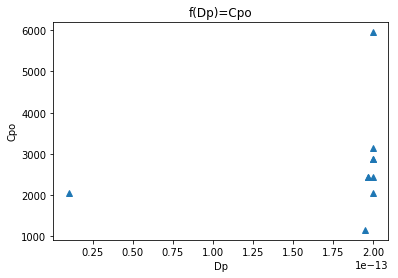

In [35]:
p.Graphique()

# Graphique : f(Dp) = c2
Ici nous remarquons que le coefficient de diffusion n'influe pas directement sur la concentration finale. Les résultats sont également très étranges. 

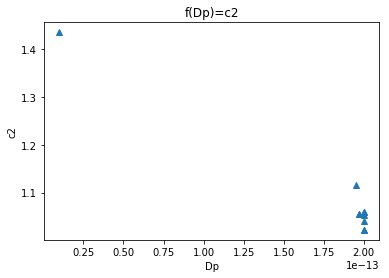

In [36]:
p.Graphique2()

# Graphique : f(Cpo) = c2
Ici nous remarquons un point étrange situé aux alentours de 2000/1.45 car il n'est pas proche des autres. Donc nous pouvons supposer qu'il y a des erreurs de calculs. Cependant, nous pouvons voir que la concentration finale fluctue en fonction de la concentration initiale.

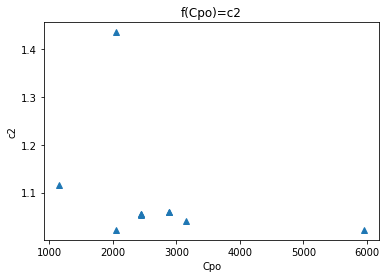

In [37]:
p.Graphique3()

# Grapgique : f(Epaisseur) = c2

Ici nous remarquons que le graphique est très étrange car les valeurs sont parfois décroissantes et parfois stagnes. 

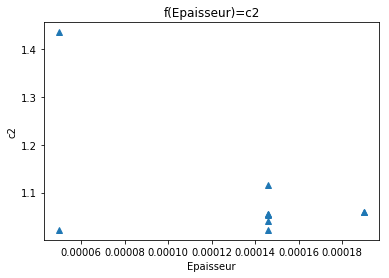

In [38]:
p.Graphique4()

Nous remarquons que réunir tous les graphiques n'est pas spécialement adéquat car les résultats sont totalement illisibles. 

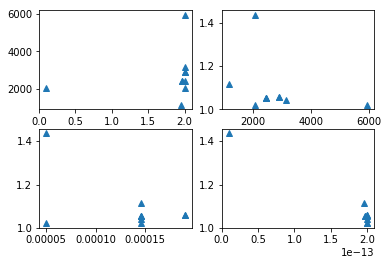

In [39]:
p.Graphique5()

# Conclusion : 
Nous avons déterminé la concentration finale, cependant les valeurs paraissent érronées. Afin d'obtenir des valeurs adéquates il faudrait enlever les hypothèses qui simblent fausses telles que la valeur de C4. Mais les calculer. 

# Nomenclature 
- A : Surface polymer (m²)
- Cpo : Concentration initale
- Cfs0 : Migrant concentration on the surface
- CfS : Migrant concentration in the food 
- Do : Diffusion coefficient
- EtOh : Ethanol 
- I-1076 : Irganox 1076
- Jfs : mass transfert migrant in the food simulant
- Jp : mass transfert migrant in the polymer
- LDPE : Low density polyethylene simulant
- t : Time 

# Bibliographie 
Baner, A., Bieber, W., Figge, K., Franz, R., & Piringer, O. (1992). Alternative fatty food
simulants for migration testing of polymeric food contact materials. Food Additives
and Contaminants, 9, 137−148.
Begley, T. H. (1997). Methods and approaches used by FDA to evaluate the safety of food
packaging materials. Food Additives and Contaminants, 14(6–7), 1−15.
Begley, T., Castle, L., Feigenbaum, A., Franz, R., Hinrichs, K., Lickly, T., Mercea, P., Milana,
M., O'Brien, A., Rebre, S., Rijk, R., & Piringer, O. (2005). Evaluation of migration
models that might be used in support of regulations for food-contact plastics. Food
Additives and Contaminants, 22(1), 73−90.
Bocquet, S., Torres, A., Romero, J., Sanchez, J., & Rios, G. M. (2005). Modelling the mass
transfer in solvent extraction processes with membranes. AIChE Journal, 51(4),
1067−1079.Brandsch, J., Mercea, P., Tosa, V., & Piringer, O. (2002). Migration modeling as a tool for
quality assurance of food packaging. Food Additives and Contaminants, 19. (pp.
29−41) (Supplement).
Crank, J. (1975). The mathematical of diffusion (2nd ed): Oxford University Press.
Cutter, C. N. (2006). Opportunities for bio-based packaging technologies to improve the
quality and safety of fresh and further processed muscle foods. Meat Science, 74,
131−142.
Dopico-García, M. S., López-Vilariño, J. M., & González-Rodríguez, M. V. (2006). Effect of
temperature and type of food simulant on antioxidant stability. Journal of Applied
Polymer Science, 100, 656−663.
EC. (2002). EU directive 2002/72/EC relating to plastics materials and articles
intended to come into contact with foodstuffs. Official Journal, 18−55 L220 of
15.08.2002.
Estay, H., Bocquet, S., Romero, J., Sanchez, J., Rios, G. M., & Valenzuela, F. (2007).
Modeling and simulation of mass transfer in near-critical extraction using a
hollow fiber membrane contactor. Chemical Engineering Science, 62(21),
5794−5808.
Food, Drug Administration (FDA) (2008). 21 CFR Parts 170. Food Additives.
Galotto, M. J., & Guarda, A. (2002). Effect of thermal treatment on overall migration using
alternative fatty food simulants. Proceedings World Pack 2002. Improving the quality of
life through packaging innovation. (pp. 1096−1102).
Gandek, T. P. (1986). Migration of phenolic antioxidants from polyolefins to aqueous
media with application to indirect food additive migration. PhD thesis, Massachusetts
Institute of Technology.
Garde, J. A., Catalá, R., & Gavara, R. (1998). Global and specific migration of antioxidants
from polypropylene films to food simulants films. Journal of Food Protection, 61(8),
1000−1006.
Garde, J. A., Catalá, R., Gavara, R., & Hernández, R. J. (2001). Characterizing the migration
of antioxidants from polypropylene into fatty food simulants. Food Additives and
Contaminants, 18(8), 750−762.
Gebhart, B., Jaluria, Y., Mahajan, R. L., & Sammakia, B. (1988). Buoyancy-induced flows
and transport. Corp: Edit. Hemisphere Pub.
Granda-Restrepo, Diana M., Soto-Valdez, Herlinda, Peralta, E., Troncoso-Rojas, R.,
Vellejo-Córdoba, B., Gámez-Meza, N., & Graciano-Verdugo, A. Z. (2009). Migration
of a-tocopherol from an active multilayer film into whole milk powder. Food
Research International, 42, 1396−1402.
Hamdani, M., Feigenbaum, A., & Vergnaud, J. M. (1997). Prediction of worst case
migration from packaging to food using mathematical models. Food Additives and
Contaminants, 14(5), 499−506.
Han, J. K., Selke, S. E., Downes, T. W., & Harte, B. R. (2003). Application of a computer
model to evaluate the ability of plastics to act as functional barriers. Packaging
Technology Science, 16, 107−118.
Helmroth, I. E., Dekker, M., & Hankemeier (2002). Influence of solvent absorption on the
migration of Irganox 1076 from LDPE. Food Additives and Contaminants, 19(2), 176−183.
Helmroth, E., Rijk, R., Dekker, M., & Jongen, W. (2002). Predictive modelling of
migration from packaging materials into food products for regulatory purposes.
Trends in Food Science and Technology, 13, 102−109.
Herdmand, R. C. (1993). Biopolymers-making materials natures' way (pp. 25−48). : John
Wiley.
Lickly, T. D., Markham, D. A., & MCDonald, M. E. (1993). Migration of acrylonitrile from
styrene/acrylonitrile copolymers into food-simulanting liquids. Journal of Agricultural
and Food Chemistry, 41, 119−124.
Lin, Y., Du, W., Tu, D., Zhong, W., & Du, Q. (2005). Space charge distribution and
crystalline structure in low density polyethylene (LDPE) blended with high density
polyethylene (HDPE). Polymer International, 54, 465−470.
MERCOSUR/GMC/Res. N°32/10 (2010). Mercosur technical regulation on migration in
materials, containers and equipment for plastics in contact with food.
Miltz, J., & Rosen Doody, V. (1984). Migration of styrene monomer from polystyrene
packaging materials into food simulants. Journal of Food Processing and Preservation,
8(3/4), 151−161.
Piergiovanni, L., Fava, P., & Schiraldi, A. (1999). Study of diffusion through LDPE film of
Di-n-butyl phthalate. Food Additives and Contaminants, 16, 353−359.
Reddy, C. S. K., Ghai, R., & Rashmi, V. C. (2003). Polyhydroxyalkanoates: An overview.
Bioresource Technology, 87, 137−146.
Risch, S. J. (2000). Flavor and package interactions. ACS Symposium Series, 756, 94−100.
Romero, J., Rios, G. M., Sanchez, J., Bocquet, S., & Saavedra, A. (2003). Modelling of
heat and mass transfer in osmotic evaporation process. AIChE Journal, 49(2),
300−308.
Sanches Silva, A., Cruz Freire, J. M., Franz, R., & Paseiro Losada, P. (2008). Time–
temperature study of the kinetics of migration of diphenylbutadiene from
polyethylene films into aqueous foodstuffs. Food Research International, 41, 138−144.
Sanches-Silva, A., Cruz Freire, J. M., Sendón García, R., Franz, R., & Paseiro Losada, P.
(2007a). Kinetic migration studies from packaging films into meat products. Meat
Science, 77(2), 238−245.
Sanches-Silva, A., Cruz Freire, J. M., Sendón, G. R., Franz, R., & Paseiro, L. P. (2007b).
Time–temperature study of the kinetics of migration of DPBD from plastics into
chocolate, chocolate spread and margarine. Food Research International, 40,
679−686.
Sanches-Silva, A., Cruz Freire, J. M., Sendón, R., Franz, R., & Paseiro Losada, P. (2009).
Migration and diffusion of diphenylbutadiene from packages into foods. Journal of
Agricultural and Food Chemistry, 57, 10225−10230.
Stoffers, N. H., Brandsch, R., Bradley, E. L., Cooper, I., Dekker, M., & Stormer, A. (2005).
Feasibility study for the development of certified reference materials for specific
migration testing. Part 2: Estimation of diffusion parameters and comparison of
experimental and predicted data. Food Additives and Contaminants, 22(2),
173−184.